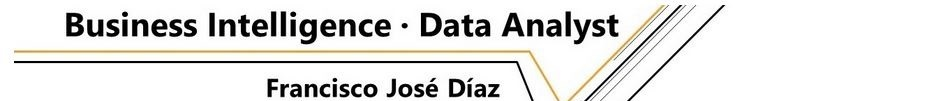

# Medias Moviles Simple

En el presente notebook se desarrollara un pronostico con medias moviles para determinar las ventas futuras de la empresa ficticia AdventureWorks. 

Primeramente se importa la informacion necesaria con una consulta SQL la cual permite obetener las ventas historicas de la empresa. 

## Setup
Importamos la librerias a utilizar

In [1]:
import pyodbc
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

Con la libreria pyodbc importamos los datos de nuestro SQL Server. Se creo el siguiente query:
    
    SELECT CONVERT(DATE,[OrderDate]) AS Order_Date, ROUND(SUM(TotalDue),-2) AS Sales 
    FROM [AdventureWorks2019].[Sales].[SalesOrderHeader] 
    GROUP BY (OrderDate)ORDER BY (OrderDate)

In [2]:
server = 'Local'
bd = 'AdventureWorks2019'

conexion = pyodbc.connect(driver = ('SQL Server'), host = server, database = bd)

df = pd.read_sql("SELECT CONVERT(DATE,[OrderDate]) AS Order_Date, ROUND(SUM(TotalDue),-2) AS Sales FROM [AdventureWorks2019].[Sales].[SalesOrderHeader] GROUP BY (OrderDate)ORDER BY (OrderDate)",conexion) 

conexion.close()

In [3]:
# Conoceremos como son los datos

df.head()

,Order_Date,Sales
0,2011-05-31,567000.0
1,2011-06-01,15400.0
2,2011-06-02,16600.0
3,2011-06-03,7900.0
4,2011-06-04,16600.0


In [4]:
# Se determinan los principales estadisticos de la variable Sales

round(df.describe(),2)

,Sales
count,1124.00
mean,109623.04
std,484500.64
min,800.00
25%,15600.00
50%,23800.00
75%,41700.00
max,4800600.00


In [5]:
# Verificamos que tipo son los datos

df.dtypes

Order_Date     object
Sales         float64
dtype: object

In [6]:
# Se convierte la variable Order Date a tipo fecha

df['Order_Date'] = pd.to_datetime(df ['Order_Date'])
df.dtypes

Order_Date    datetime64[ns]
Sales                float64
dtype: object

In [7]:
# Se cambia el index por Order Date
df = df.set_index('Order_Date')

In [8]:
# Las ventas se encontraban por dia, por lo tanto se agruparan por mes
df = df.resample('M').sum()
df.head()

,Sales
Order_Date,
2011-05-31,567000.0
2011-06-30,507200.0
2011-07-31,2292400.0
2011-08-31,2800600.0
2011-09-30,554800.0


In [9]:
# Se desarrolla el modelo de medias moviles para una ventana igual a 3 
# por lo tanto se pronosticara ventas de los proximos 2 meses

df['ForecastSMA03']= round(df['Sales'].rolling(window=3).mean(),2)
df.head(10)

,Sales,ForecastSMA03
Order_Date,,
2011-05-31,567000.0,NaN
2011-06-30,507200.0,NaN
2011-07-31,2292400.0,1122200.00
2011-08-31,2800600.0,1866733.33
2011-09-30,554800.0,1882600.00
2011-10-31,5155900.0,2837100.00
2011-11-30,815300.0,2175333.33
2011-12-31,1462500.0,2477900.00
2012-01-31,4458300.0,2245366.67


<AxesSubplot: xlabel='Order_Date'>

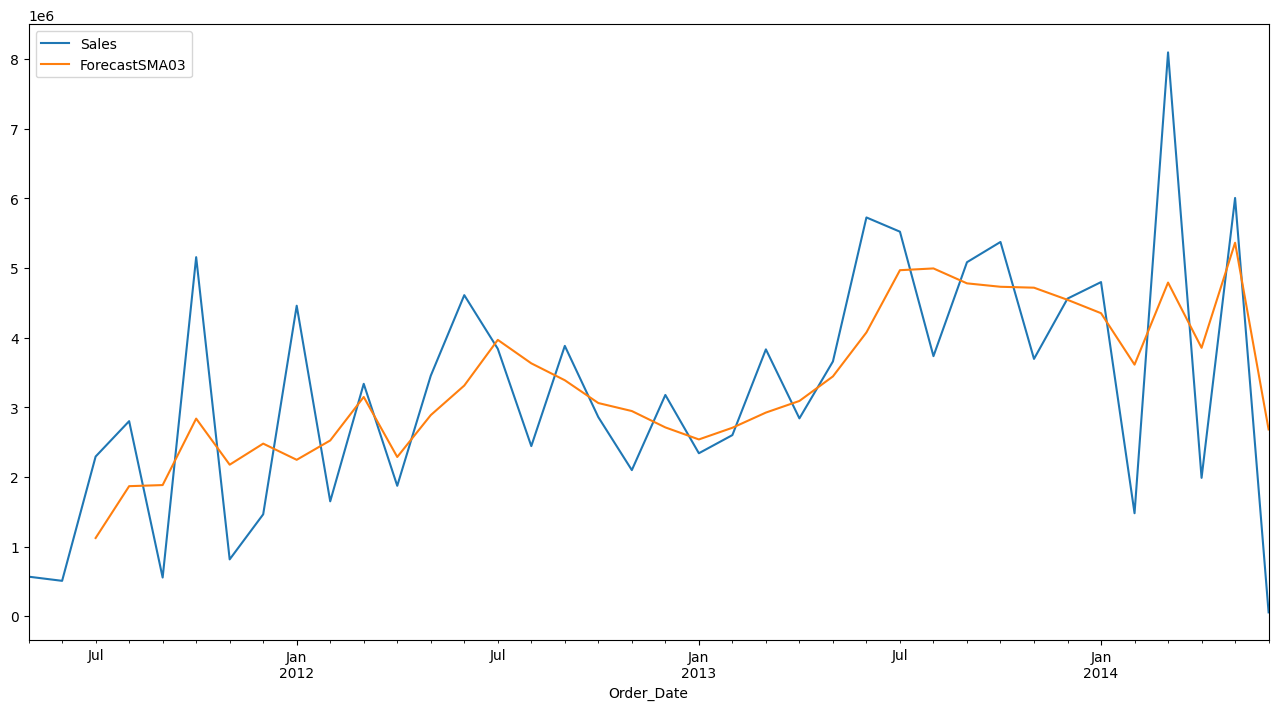

In [10]:
# Se crea una visualizacion del modelo de medias moviles

df[['Sales', 'ForecastSMA03']].plot(figsize=(16, 8))

In [11]:
# Se observan los ultimos 5 registros del dataframe
df.tail()

,Sales,ForecastSMA03
Order_Date,,
2014-02-28,1478100.0,3612233.33
2014-03-31,8097000.0,4791000.00
2014-04-30,1986100.0,3853733.33
2014-05-31,6006200.0,5363100.00
2014-06-30,54100.0,2682133.33


Los pronosticos de ventas para los siguientes meses sera Julio 2014 de 2,020,100 y para Agosto 2014 de 18,033.33